### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms submodule
    - 이미지 크기 조절
    - 이미지 정규화
    - 이미지 자르기
    - 이미지 회전 등등 다양한 기능 제공
    - 이미지 데이터 타입 ==> pillow image

In [1]:
import cv2
from torchvision import transforms
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_PATH = '../image/'
IMG_FILE = IMG_PATH + 'face.jpg'

In [3]:
cv_img = cv2.imread(IMG_FILE)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

pil_img = Image.open(IMG_FILE)

In [4]:
print(f"type(cv_img): {type(cv_img)}")
print(f"type(pil_img): {type(pil_img)}")    # 한번 더 전처리하는 과정이 필요

type(cv_img): <class 'numpy.ndarray'>
type(pil_img): <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [5]:
cv_ts_1 = torch.tensor(cv_img)
print(f"cv_ts_1: {cv_ts_1.shape}, {cv_ts_1.ndim}D")

cv_ts_2 = transforms.ToTensor()(cv_img) # torchvision 용
print(f"cv_ts_2: {cv_ts_2.shape}, {cv_ts_2.ndim}D")

cv_ts_1: torch.Size([1439, 1081, 3]), 3D
cv_ts_2: torch.Size([3, 1439, 1081]), 3D


In [8]:
pil_ts_1 = torch.tensor(np.array(pil_img))
print(f"pil_ts_1: {pil_ts_1.shape}, {pil_ts_1.ndim}D")

pil_ts_2 = transforms.ToTensor()(np.array(pil_img))
print(f"pil_ts_2: {pil_ts_2.shape}, {pil_ts_2.ndim}D")

pil_ts_3 = transforms.PILToTensor()(pil_img)
print(f"pil_ts_3: {pil_ts_3.shape}, {pil_ts_3.ndim}D")

pil_ts_1: torch.Size([1439, 1081, 3]), 3D
pil_ts_2: torch.Size([3, 1439, 1081]), 3D
pil_ts_3: torch.Size([3, 1439, 1081]), 3D


cv_np_1: (1439, 1081, 3), 3D


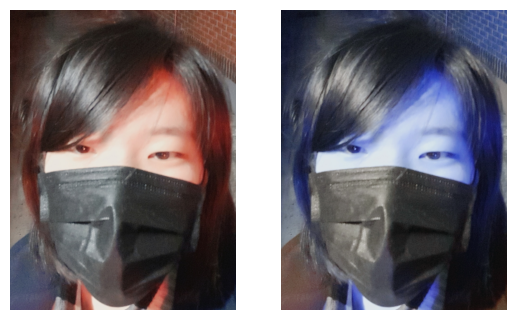

In [27]:
cv_np_1 = cv_ts_1.numpy()
print(f"cv_np_1: {cv_np_1.shape}, {cv_np_1.ndim}D")

plt.subplot(1, 2, 1)
plt.imshow(cv_np_1)
plt.axis('off')

cv_ts_3 = torch.tensor(cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR))
cv_np_2 = cv_ts_3.numpy()

plt.subplot(1, 2, 2)
plt.imshow(cv_np_2)

plt.axis('off')
plt.show()

cv_np_3: (1439, 1081, 3), 3D
cv_np_4: (1439, 1081, 3), 3D


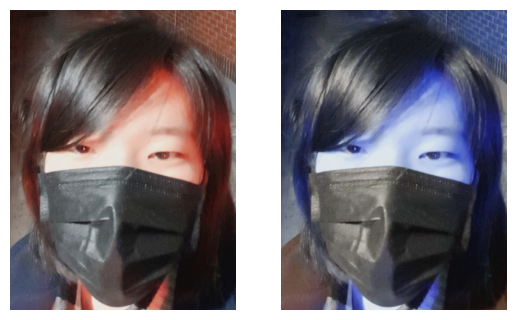

In [39]:
cv_np_3 = cv_ts_2.transpose(2, 0).transpose(1, 0).numpy()
print(f"cv_np_3: {cv_np_1.shape}, {cv_np_1.ndim}D")

plt.subplot(1, 2, 1)
plt.imshow(cv_np_3)
plt.axis('off')

cv_ts_4 = transforms.ToTensor()(cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR))
cv_np_4 = cv_ts_4.transpose(2, 0).transpose(1, 0).numpy()
print(f"cv_np_4: {cv_np_4.shape}, {cv_np_4.ndim}D")

plt.subplot(1, 2, 2)
plt.imshow(cv_np_4)

plt.axis('off')
plt.show()

In [42]:
from torchvision.transforms import v2

print(f'v2 type: {type(v2.ToImage()(cv_img))}')
v2.ToImage()(cv_img).shape

v2 type: <class 'torchvision.tv_tensors._image.Image'>


torch.Size([3, 1439, 1081])

In [43]:
pil_img_1 = transforms.ToPILImage()(pil_ts_2)

print(f"pil image: {pil_img_1.width}, {pil_img_1.height}, {pil_img_1.mode}")

pil_img_1.show()

pil image: 1081, 1439, RGB
